In [8]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [9]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats

In [10]:
df = pd.read_csv("Historical_Attendance.csv")
df.head()
df.dtypes

Market_Size    object
Market_Rank     int64
Item           object
Year            int64
Attendance      int64
dtype: object

In [11]:
dfyr = df[(df['Year'] >= 2013)]

dfyr


,Market_Size,Market_Rank,Item,Year,Attendance
12,Big,1,New York Knicks,2013,780353
13,Big,1,New York Knicks,2014,812292
14,Big,1,New York Knicks,2015,812292
15,Big,1,New York Knicks,2016,812292
16,Big,1,New York Knicks,2017,810741
29,Big,2,Brooklyn Nets,2013,704702
30,Big,2,Brooklyn Nets,2014,707331
31,Big,2,Brooklyn Nets,2015,698529
32,Big,2,Brooklyn Nets,2016,620142
33,Big,2,Brooklyn Nets,2017,632608


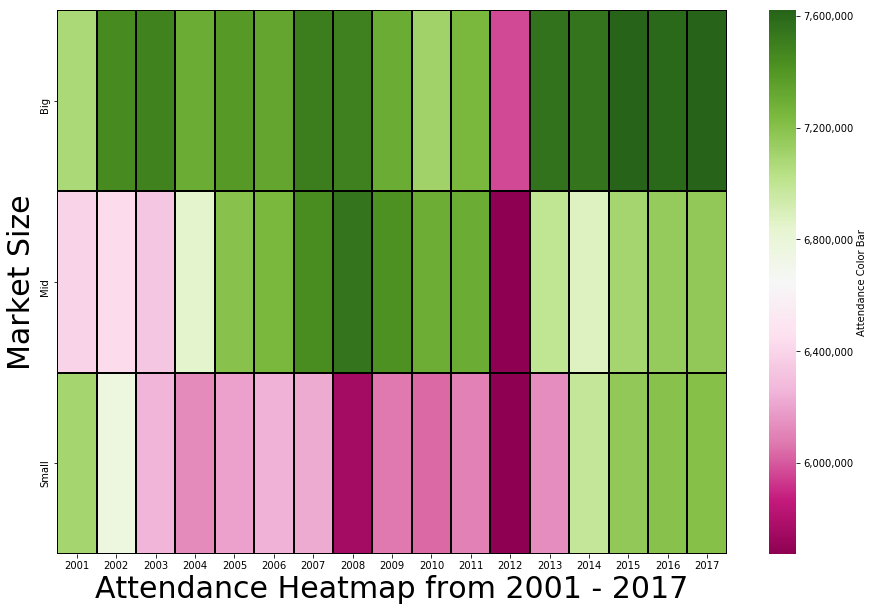

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
attendance = pd.pivot_table(df,index=["Market_Size", "Year"],values=["Attendance"], aggfunc=np.sum)
attendance.head()
attendance_df = attendance.unstack()
attendance_df.head()
comma_fmt = FuncFormatter(lambda Attendance, p: format(int(Attendance), ','))
ax = sns.heatmap(attendance_df, cmap="PiYG",linewidths=1 ,robust=True,linecolor="black", cbar_kws={'label': 'Attendance Color Bar','format':comma_fmt}, annot_kws={"size": 20},xticklabels=("2001", "2002", "2003", "2004", "2005","2006","2007", "2008", "2009","2010","2011", "2012", "2013","2014","2015","2016","2017" )) 

ax.set( ylabel="Market Size",
       xlabel="Attendance Heatmap from 2001 - 2017")

ax.yaxis.label.set_size(30)
ax.xaxis.label.set_size(30)
plt.savefig('Attendance_Heatmap.png')

In [25]:
df_team_5_big = df.loc[df['Item'].isin(['Golden State Warriors','New York Knicks','San Antonio Spurs','Boston Celtics','Los Angeles Lakers','Houston Rockets','Cleveland Cavaliers'])]
df_team_5_big2 = df_team_5_big[(df_team_5_big['Year']>=2012)] 

df_team_5_big2
df_team_5_big2.head()


,Market_Size,Market_Rank,Item,Year,Attendance
11,Big,1,New York Knicks,2012,652179
12,Big,1,New York Knicks,2013,780353
13,Big,1,New York Knicks,2014,812292
14,Big,1,New York Knicks,2015,812292
15,Big,1,New York Knicks,2016,812292


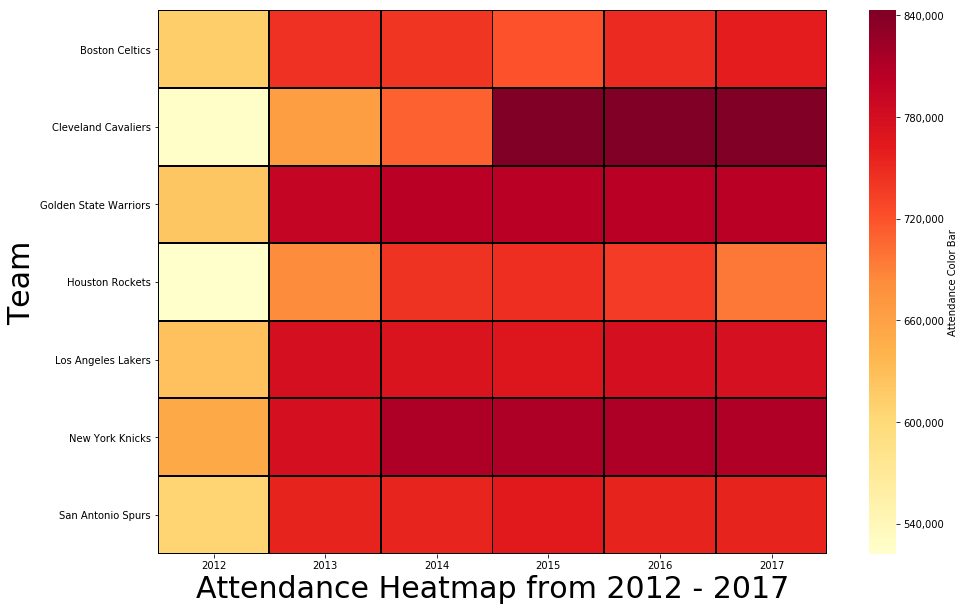

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

attendance_team = pd.pivot_table(df_team_5_big2,index=["Item", "Year"],values=["Attendance"], aggfunc=np.sum)
attendance_team.head()
attendance_team_df = attendance_team.unstack()
comma_fmt = FuncFormatter(lambda Attendance, p: format(int(Attendance), ','))
ax = sns.heatmap(attendance_team_df, cmap="YlOrRd",linewidths=1 ,robust=True,linecolor="black", cbar_kws={'label': 'Attendance Color Bar','format':comma_fmt}, annot_kws={"size": 20},xticklabels=( "2012", "2013","2014","2015","2016","2017" )) 

ax.set( ylabel="Team",
       xlabel="Attendance Heatmap from 2012 - 2017")

ax.yaxis.label.set_size(30)
ax.xaxis.label.set_size(30)
plt.savefig('Attendance_team_Heatmap.png')